In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [60]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Range')

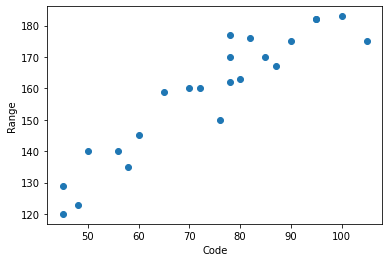

In [61]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [62]:
##correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


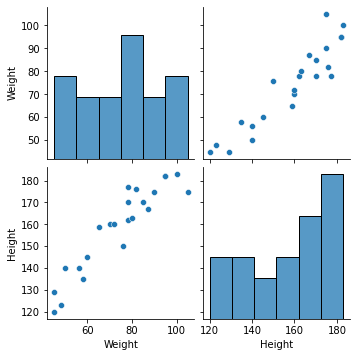

In [63]:
##seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [108]:
##independent and dependent features
X=df[['Weight']]#independent
y=df['Height']#dependent


In [109]:
##TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [111]:
X.shape

(23, 1)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [113]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [114]:
## Standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

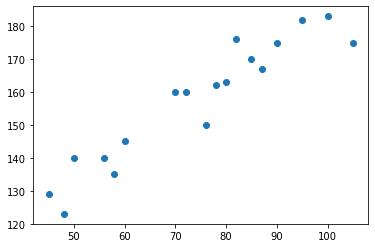

In [94]:
plt.scatter(X_train,y_train)

In [116]:
##Apply Linear Regression - sklearn
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() #when ever we use libraries from sklearn we should initialize it
regressor.fit(X_train,y_train)

LinearRegression()

In [120]:
print("The slope or coefficient of weight is", regressor.coef_)
print("The intercept is", regressor.intercept_)

The slope or coefficient of weight is [17.03440872]
The intercept is 157.5


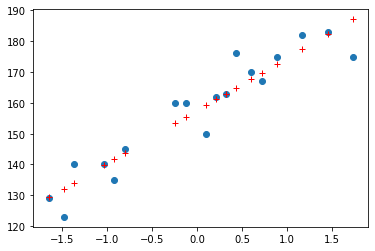

In [126]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r+')

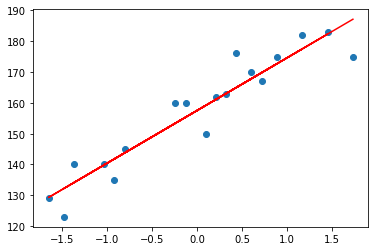

In [128]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1.predicted height output = intercept+coef_(weights)
2.y_pred_train=157.5+17.03(X_train)

### prediction of test data
1.predicted height output = intercept +coef_(weights)
2.y_pred_test=157.5+17.03(X_test)

In [130]:
y_pred_test=regressor.predict(X_test)

In [131]:
y_pred_test,y_test ##compare these two to get R square value & adjusted R square

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

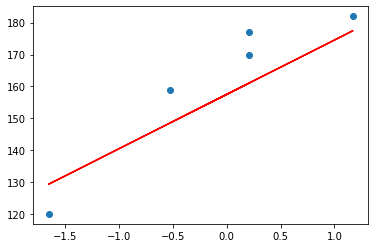

In [132]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

# performance metrics
### MSE,MAE,RMSE
#### R square and adjusted R square


In [133]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [134]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


# R Square

#formula

R^2 =1-SSR/SST
R^2= coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [138]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [139]:
score

0.776986986042344

# Adjusted R square

adjusted R2=1-[(1-R2)*(n-1)/(n-k-1)]
where
R2: the R2 of the model n: the number of observations k: The number of predictor variable

In [140]:
#Adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

# R square always > than adjusted R square

In [142]:
##new data point weight is 80
scaled_weight=scaler.transform([[80]])
scaled_weight


/Users/udaykiran/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [146]:
print("The height prediction for weight 80kg is:",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80kg is: [163.01076266]


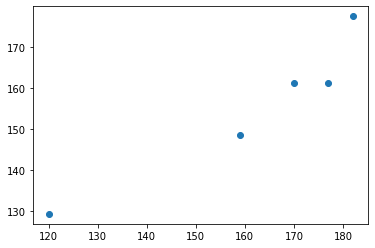

In [147]:
#Assumptions
##plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [148]:
#Residuals - diff b/w y_test and y_pred_test

residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/Users/udaykiran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

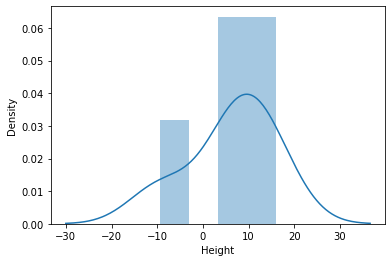

In [150]:
#plot residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

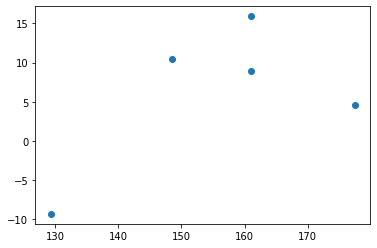

In [151]:
# scatter plot with respect to prediction and residuals
##uniform distribution
plt.scatter(y_pred_test,residuals)